### Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer()

In [ ]:
import numpy as np
import pandas as pd
df_processed = pd.read_csv("/content/drive/Shareddrives/응머러러/df_merged_new.csv")

import re
def reprocess(text):
    return re.sub(r'[^\s\d\w]','',text).split(' ')
df_processed['title_new'] = df_processed['title_new'].apply(reprocess)

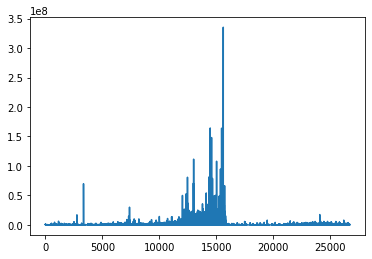

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_processed['views'])
plt.show()

In [ ]:
n1 = np.percentile(df_processed['views'].values, 25)
n2 = np.percentile(df_processed['views'].values,50)
n3 = np.percentile(df_processed['views'].values, 75)


In [ ]:
p1 = np.percentile(df_processed['publish_time'].values, 25)
p2 = np.percentile(df_processed['publish_time'].values,50)
p3 = np.percentile(df_processed['publish_time'].values, 75)

In [ ]:
### preprocess views-levels
def ViewPreproc2(data):
    if data <= n1:
        label = 0
    elif n1 < data <= n2:
        label = 1
    elif n2 < data <= n3:
        label = 2
    elif data > n3:
        label = 3
    return label

df_viewlv = []
for view in df_processed['views']:
    label = ViewPreproc2(view)
    df_viewlv.append(label)
df_processed['view_lv'] = df_viewlv

In [ ]:
### preprocess time-levels
def ViewPreproc2(data):
    if data <= p1:
        label = 0
    elif p1 < data <= p2:
        label = 1
    elif p2 < data <= p3:
        label = 2
    elif data > p3:
        label = 3
    return label

df_timelv = []
for time in df_processed['publish_time']:
    label = ViewPreproc2(time)
    df_timelv.append(label)
df_processed['time_lv'] = df_timelv

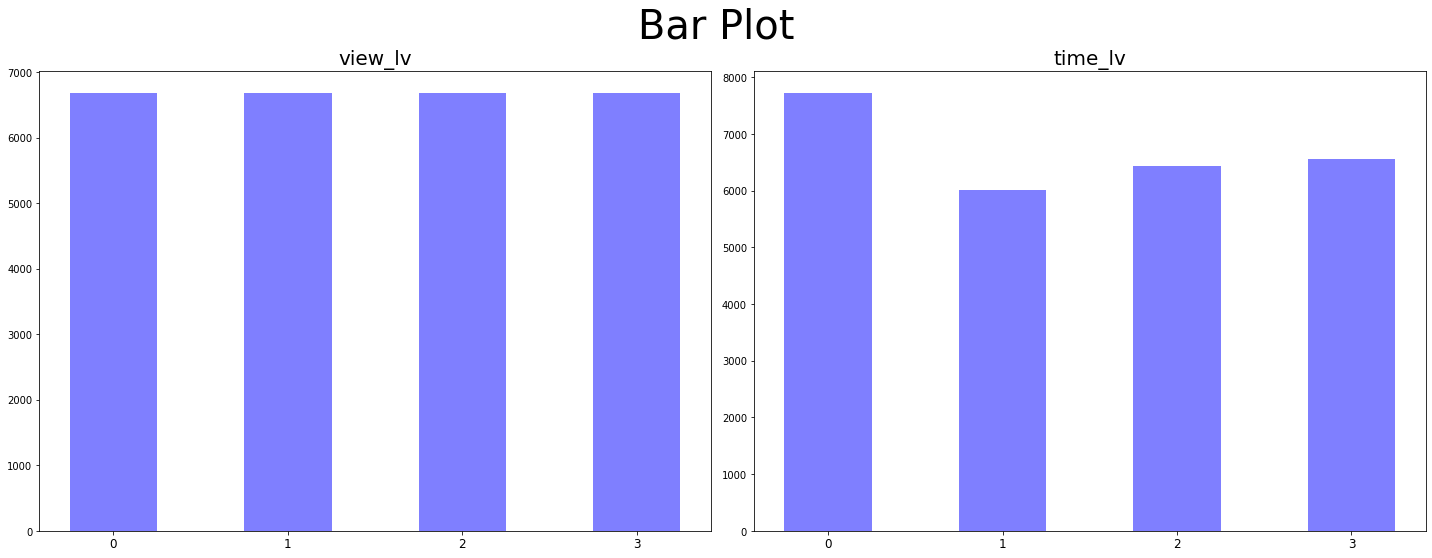

In [ ]:
feature = ['view_lv', 'time_lv']

plt.figure(figsize=(20,15))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.title(feature[i], fontsize=20)
    temp = df_processed[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.
plt.plot(df_processed['view_lv'])
plt.show()

In [ ]:
df_processed.head()

,label,title_new,emoji,views,subs,channel_name,publish_time,view_lv,time_lv
0,0,"[사람, 번만, 사람, 레전드, 꿀잼, 드라마, 뷰티, 사이드, 보기]",False,804394.0,1960000.0,고몽,202205,3,3
1,0,"[할인, 뷰마, 박스, 공개]",True,199959.0,352000.0,뷰티마우스,202205,2,3
2,0,"[요즘, 프로필, 메이크업, 연예인, 프로필, 메이크업, 역대, 메이크업]",False,61394.0,159000.0,옥뷰티 OK Beauty,202205,2,3
3,0,"[배우, 잠적, 이유, 뷰티, 사이드, 요약]",False,7568.0,250000.0,DRAMA Voyage,202205,1,3
4,0,"[청담동, 메이크업, 추천, 그대로, 구매, 지속, 파운데이션, 가닥, 속눈썹, 고...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM,202205,2,3


- 전체 중 조회수 높은 상위레벨에 속하는거랑 그렇지 않은 거 따로 클러스터링 -> 제목의 특성 파악하기
- 라벨별로 클러스터링해서 제목에 뭐가 들어가야 높은 조회수를 보이는지 파악해보기

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_processed['emoji_label'] = le.fit_transform(df_processed['emoji'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

### make data to list of strings again
title_filtered = []
for title in df_processed['title_new']:
    title_str =' '.join(title)
    title_filtered.append(title_str) # list of docs, doc 은 단어들로 구성이 된 string data
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환
df_processed['title_str']=title_filtered
display(df_processed)

,label,title_new,emoji,views,subs,channel_name,publish_time,view_lv,time_lv,emoji_label,title_str
0,0,"[사람, 번만, 사람, 레전드, 꿀잼, 드라마, 뷰티, 사이드, 보기]",False,804394.0,1960000.0,고몽,202205,3,3,0,사람 번만 사람 레전드 꿀잼 드라마 뷰티 사이드 보기
1,0,"[할인, 뷰마, 박스, 공개]",True,199959.0,352000.0,뷰티마우스,202205,2,3,1,할인 뷰마 박스 공개
2,0,"[요즘, 프로필, 메이크업, 연예인, 프로필, 메이크업, 역대, 메이크업]",False,61394.0,159000.0,옥뷰티 OK Beauty,202205,2,3,0,요즘 프로필 메이크업 연예인 프로필 메이크업 역대 메이크업
3,0,"[배우, 잠적, 이유, 뷰티, 사이드, 요약]",False,7568.0,250000.0,DRAMA Voyage,202205,1,3,0,배우 잠적 이유 뷰티 사이드 요약
4,0,"[청담동, 메이크업, 추천, 그대로, 구매, 지속, 파운데이션, 가닥, 속눈썹, 고...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM,202205,2,3,0,청담동 메이크업 추천 그대로 구매 지속 파운데이션 가닥 속눈썹 고급 하이 라이터 웨...
...,...,...,...,...,...,...,...,...,...,...,...
26737,4,"[아줌마, 브이, 로그, 주부, 일상, 네일아트]",False,93572.0,102000.0,양아치TV AUNT TV,202002,2,0,0,아줌마 브이 로그 주부 일상 네일아트
26738,4,"[미국, 유학생, 일상, 브이, 로그, 학교, 브이, 로그, 코딩, 수업, 학교, ...",False,1208.0,522.0,예슬 Serena,202002,0,0,0,미국 유학생 일상 브이 로그 학교 브이 로그 코딩 수업 학교 스킨 케어
26739,4,"[미국, 유학생, 일상, 브이, 로그, 주말, 브이, 로그, 요리, 해먹, 마트, ...",False,950.0,522.0,예슬 Serena,202002,0,0,0,미국 유학생 일상 브이 로그 주말 브이 로그 요리 해먹 마트 일상 마스크 마트 중국...
26740,4,[],False,162171.0,1070000.0,Tesla US,202002,2,0,0,


In [ ]:
df_processed.head()

,label,title_new,emoji,views,subs,channel_name,publish_time,view_lv,time_lv,emoji_label,title_str
0,0,"[사람, 번만, 사람, 레전드, 꿀잼, 드라마, 뷰티, 사이드, 보기]",False,804394.0,1960000.0,고몽,202205,3,3,0,사람 번만 사람 레전드 꿀잼 드라마 뷰티 사이드 보기
1,0,"[할인, 뷰마, 박스, 공개]",True,199959.0,352000.0,뷰티마우스,202205,2,3,1,할인 뷰마 박스 공개
2,0,"[요즘, 프로필, 메이크업, 연예인, 프로필, 메이크업, 역대, 메이크업]",False,61394.0,159000.0,옥뷰티 OK Beauty,202205,2,3,0,요즘 프로필 메이크업 연예인 프로필 메이크업 역대 메이크업
3,0,"[배우, 잠적, 이유, 뷰티, 사이드, 요약]",False,7568.0,250000.0,DRAMA Voyage,202205,1,3,0,배우 잠적 이유 뷰티 사이드 요약
4,0,"[청담동, 메이크업, 추천, 그대로, 구매, 지속, 파운데이션, 가닥, 속눈썹, 고...",False,193907.0,133000.0,뷰티숨BEAUTYSOOM,202205,2,3,0,청담동 메이크업 추천 그대로 구매 지속 파운데이션 가닥 속눈썹 고급 하이 라이터 웨...


In [ ]:
y

0        3
1        0
2        0
3        0
4        0
        ..
26737    0
26738    0
26739    0
26740    0
26741    0
Name: view_lv, Length: 26742, dtype: int64

### Vectorization ver 1.

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(min_df=1, ngram_range=(1,2), max_features = 1500)
tfidf_features2 = tfidf_vectorizer2.fit_transform(df_processed['title_str'])
tfidf_features2 = np.array(tfidf_features2.todense())
tfidf_features2.shape

(26742, 1500)

In [ ]:
tfidf2 = pd.DataFrame(tfidf_features2)
X = pd.concat([tfidf2, df_processed[['subs','emoji_label','publish_time']]], axis = 1)
y = df_processed['view_lv']

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
max_scaler = MaxAbsScaler()

X_sc = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
len(X_sc)

26742

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                                    test_size=0.1, 
                                                    random_state=0, 
                                                    stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_rnd = rnd_clf.predict(X_test)
accuracy_score(y_test, y_rnd)

0.7480373831775701

딥러닝,,, 근데 이렇게 하는게 맞나..

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
yed = pd.get_dummies(df_processed['view_lv'])

In [ ]:
Xed_train, Xed_test, yed_train, yed_test = train_test_split(X_sc, yed, 
                                                    test_size=0.1, 
                                                    random_state=0, 
                                                    stratify=yed)

In [ ]:
Xed_train.shape

(24067, 1503)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=1503, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.fit(Xed_train, yed_train, epochs=100)

Epoch 1/100
753/753 [==============================] - 3s 3ms/step - loss: 0.1690 - accuracy: 0.4195
Epoch 2/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1428 - accuracy: 0.5483
Epoch 3/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1344 - accuracy: 0.5870
Epoch 4/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1270 - accuracy: 0.6171
Epoch 5/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1218 - accuracy: 0.6391
Epoch 6/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1166 - accuracy: 0.6527
Epoch 7/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1131 - accuracy: 0.6675
Epoch 8/100
753/753 [==============================] - 2s 3ms/step - loss: 0.1086 - accuracy: 0.6861
Epoch 9/100
753/753 [==============================] - 3s 3ms/step - loss: 0.1053 - accuracy: 0.6967
Epoch 10/100
753/753 [==============================] - 3s 4ms/step - loss: 0.1013 - accura

In [ ]:
model.evaluate(Xed_test, yed_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.6449


[0.1434376984834671, 0.644859790802002]

### with word2vec

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(df_processed['title_new'], window=3, min_count=3, size=100, workers=4)
#첫번째 인자 ; 분석하고자 하는 데이터
#window => 보고자 하는 양쪽 단어의 수
#min_count => 전체 corpus에서 사용 빈도수가 min_count보다 낮은 단어 제외
#size => word vector의 크기 :일반적으로 100~300 사이의 값을 사용/
#코사인 값을 이용해서 벡터간 유사도 계싼하는 경우가 더 많음
# https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
!

/bin/bash: gensim: command not found


In [ ]:
from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save('vectors.kv')
reloaded_word_vectors = KeyedVectors.load('vectors.kv')

In [ ]:
def return_words(sim_words):
  words=[]
  for word in sim_words:
    words.append(word[0])
  return words



In [ ]:
w2v_res = pd.DataFrame(columns=['먹방','운동','뷰티','지식','브이로그'])
w2v_res['먹방'] = return_words(model.wv.similar_by_word('먹방',topn=50))
w2v_res['운동'] = return_words(model.wv.similar_by_word('운동',topn=50))
w2v_res['뷰티'] = return_words(model.wv.similar_by_word('메이크업',topn=50))
w2v_res['지식'] = return_words(model.wv.similar_by_word('지식',topn=50))
w2v_res['브이로그'] = return_words(model.wv.similar_by_word('로그',topn=50))
w2v_res

,먹방,운동,뷰티,지식,브이로그
0,떡볶이,산소,헤어,투자,일상
1,디저트,홈트,웨딩,분양,공부
2,치킨,루틴,트릭,센터,무채색
3,리얼,전신,리뷰,청라,카페
4,불닭,근력,청담동,타워,토론토
5,치즈,올인원,셀럽,산업,랩스
6,젤리,복근,차홍,정보,직장인
7,레시피,에센셜,얼굴,급량,급똥
8,라면,하체,진정,가산동,스터디
9,사운드,뱃살,머리,동서,마켓


In [ ]:
model.wv.similar_by_word('과천',topn=50)

[('타운', 0.9994974732398987),
 ('상가', 0.9981666803359985),
 ('배곧', 0.9980620741844177),
 ('분석', 0.9979628920555115),
 ('아파트', 0.9978680610656738),
 ('향동', 0.9978657960891724),
 ('신도시', 0.9978625774383545),
 ('공장', 0.9977713227272034),
 ('현대', 0.9977194666862488),
 ('단지', 0.9974903464317322),
 ('테크노', 0.9974736571311951),
 ('평택', 0.9974135160446167),
 ('천안', 0.9973853826522827),
 ('캠퍼스', 0.997384250164032),
 ('드라이브인', 0.9973188638687134),
 ('프라임', 0.9971895217895508),
 ('테라', 0.9970800280570984),
 ('사무실', 0.9968219995498657),
 ('에이스', 0.9968173503875732),
 ('입지', 0.9967910647392273),
 ('다산', 0.9965282678604126),
 ('세마역', 0.9964801073074341),
 ('평촌', 0.9964709281921387),
 ('오피스텔', 0.9960968494415283),
 ('임대', 0.9960734844207764),
 ('현장', 0.9958606958389282),
 ('블럭', 0.9955324530601501),
 ('옥정', 0.9954339861869812),
 ('프리미어', 0.9952459931373596),
 ('비즈', 0.9946597218513489),
 ('시티', 0.9946438074111938),
 ('퍼블릭', 0.9944472312927246),
 ('안양', 0.9942562580108643),
 ('밸리', 0.9938727617263794),

In [ ]:
# 유사도 기준 군집화분석

words = list(model.wv.index2word)
words_matrix = model.wv[words]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, max_iter=100)
clusters = kmeans.fit_predict(words_matrix) # KMeans 알고리즘으로 학습

for index, cluster_id in enumerate(clusters):
    if cluster_id==2:
        print(cluster_id, words[index])

In [ ]:
type(words_matrix)

numpy.ndarray

In [ ]:
words_matrix.shape

(8387, 100)

In [ ]:
tf_vectorizer = CountVectorizer(min_df=10, ngram_range=(1,2), max_features = 1500)
tf_features = tf_vectorizer.fit_transform(df_processed['title_str'])
tf_features = np.array(tf_features.todense())
tf_features.shape

(26742, 1500)

In [ ]:
tf.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Length: 1500, dtype: int64

In [ ]:
tf = pd.DataFrame(tf_features)
X3 = pd.concat([tf, df_processed[['subs','emoji_label','publish_time']]], axis = 1)
y3 = df_processed['view_lv']

In [ ]:
X3

,0,1,2,3,4,5,6,7,8,9,...,1493,1494,1495,1496,1497,1498,1499,subs,emoji_label,publish_time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1960000.0,0,202205
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,352000.0,1,202205
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,159000.0,0,202205
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,250000.0,0,202205
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,133000.0,0,202205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,102000.0,0,202002
26738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,522.0,0,202002
26739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,522.0,0,202002
26740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1070000.0,0,202002


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
max_scaler = MaxAbsScaler()

X_sc3 = scaler.fit_transform(X3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
len(X_sc3)

26742

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc3, y3, 
                                                    test_size=0.1, 
                                                    random_state=0, 
                                                    stratify=y3)

In [ ]:
from sklearn.model_selection import train_test_split
X_sc4 = max_scaler.fit_transform(X3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sc4, y3, 
                                                    test_size=0.1, 
                                                    random_state=0, 
                                                    stratify=y3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rnd_clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', 
                                 max_depth = None, min_samples_split=2,
                                 n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_rnd = rnd_clf.predict(X_test)
accuracy_score(y_test, y_rnd)

0.7514018691588785

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_rnd)

0.7216533295422056

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100)
ada_clf.fit(X_train, y_train)
y_ada = ada_clf.predict(X_test)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
print(accuracy_score(y_test, y_ada), r2_score(y_test, y_ada))

0.7375700934579439 0.7141789291539727


In [ ]:
ada_clf2 = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50)
ada_clf2.fit(X_train, y_train)
y_ada2 = ada_clf2.predict(X_test)
print(accuracy_score(y_test, y_ada2), r2_score(y_test, y_ada2))

0.7476635514018691 0.7186635693869126


In [ ]:
ada_clf3 = AdaBoostClassifier(DecisionTreeClassifier(), learning_rate = 0.5, n_estimators=50)
ada_clf3.fit(X_train, y_train)
y_ada3 = ada_clf3.predict(X_test)
print(accuracy_score(y_test, y_ada3), r2_score(y_test, y_ada3))

0.7465420560747663 0.7058076007191518


In [ ]:
ada_clf4 = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50)
ada_clf4.fit(X_train2, y_train2)
y_ada4 = ada_clf4.predict(X_test2)
print(accuracy_score(y_test2, y_ada4), r2_score(y_test2, y_ada4))

0.742803738317757 0.7079004328278571


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train, y_train)
y_gb = gb_clf.predict(X_test)
accuracy_score(y_test, y_gb)
r2_score(y_test, y_gb)

0.6214963643398844

In [ ]:
print(accuracy_score(y_test, y_gb), r2_score(y_test, y_gb))

0.6512149532710281 0.6214963643398844


In [ ]:
from gensim import corpora
from gensim import models

import pickle
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

def build_doc_word_matrix(docs):
    dictionary = corpora.Dictionary(docs)
    # 각 단어의 ID 정보를 얻음
    corpus = []
    for doc in docs:
        bow = dictionary.doc2bow(doc) # 각 문서를 TF 정보를 이용해서 벡터로 변환
        corpus.append(bow)

    return corpus, dictionary

In [ ]:
def print_topic_words(model):
    f = open('topic_results_test.txt','w')
    for topic_id in range(model.num_topics):
        word_probs = model.show_topic(topic_id, 2)
        print("Topic ID: {}".format(topic_id))
        f.write(str(topic_id)+'\n')
        for word, prob in word_probs:
            print("\t{}\t{}".format(word, prob))
            f.write(str(word)+'\t'+str(prob)+'\n')
        print("\n")
    f.close()

In [ ]:
df_highviews = df_processed[df_processed['view_lv']==3]
df_highviews.shape

(6686, 11)

In [ ]:
corpus, dictionary = build_doc_word_matrix(df_highviews['title_new'])
lda_model = models.ldamodel.LdaModel(corpus, num_topics=4, id2word=dictionary)
print_topic_words(lda_model)

Topic ID: 0
	브이	0.10641777515411377
	로그	0.10344487428665161


Topic ID: 1
	먹방	0.06760582327842712
	브이	0.0469050258398056


Topic ID: 2
	브이	0.07204253226518631
	로그	0.06523484736680984


Topic ID: 3
	먹방	0.03509318083524704
	공부	0.018101409077644348




4
6
8
10
12
14
16
18
20


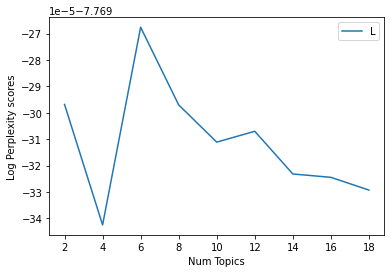

In [ ]:
### calculating log perplexity score to check optimal # of topics
start1 = 2
limit1 = 20
step1 = 2
perplexity_scores=[]
topic_num = 2
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                    id2word=dictionary,
                    alpha='auto')
    perplexity_scores.append(lda_model.log_perplexity(corpus))
    topic_num += step1
    print(topic_num)

import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f8fe6d73ebac44077d99cd5ae7500fa491c73a69d4622ce7d8fda3cc99001970
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(prepared_data)
pyLDAvis.save_html(prepared_data, 'LDAvis_2.html')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
print(df_highviews[df_highviews['label']==0]['label'].count()) #뷰티
print(df_highviews[df_highviews['label']==1]['label'].count()) #운동
print(df_highviews[df_highviews['label']==2]['label'].count()) #먹방
print(df_highviews[df_highviews['label']==3]['label'].count()) #지식
print(df_highviews[df_highviews['label']==4]['label'].count()) #브이로그

285
1276
3495
349
1281


In [ ]:
topic_results=lda_model.get_document_topics(corpus, minimum_probability=0.0)
topic_DTM =[]
for k in range(len(topic_results)):
    topic_vector = [prob for i, prob in topic_results[k]]
    topic_DTM.append(topic_vector)
topic_DTM = np.array(topic_DTM)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(topic_DTM)